In [1]:
from sklearn.cluster import KMeans
import seaborn as s
import pandas as p
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = p.read_csv('./Mall_Customers.csv',index_col='CustomerID')

In [3]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df.isnull()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
...,...,...,...,...
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
x = df.iloc[:,[2,3]].values

In [9]:
df.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [10]:
wcss = []

for i in range(1,11):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

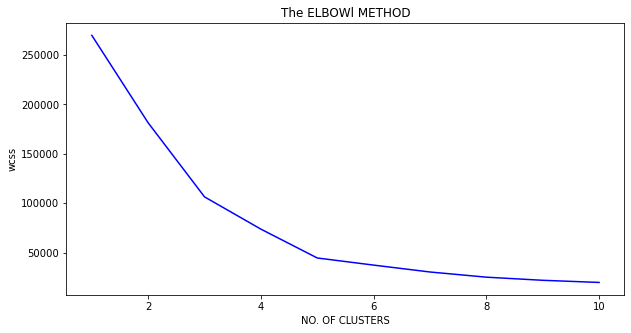

In [11]:

plt.figure(figsize=(10,5))
s.lineplot(range(1,11),wcss, color='blue')
plt.title('The ELBOWl METHOD')
plt.xlabel('NO. OF CLUSTERS')
plt.ylabel('wcss')
plt.show()

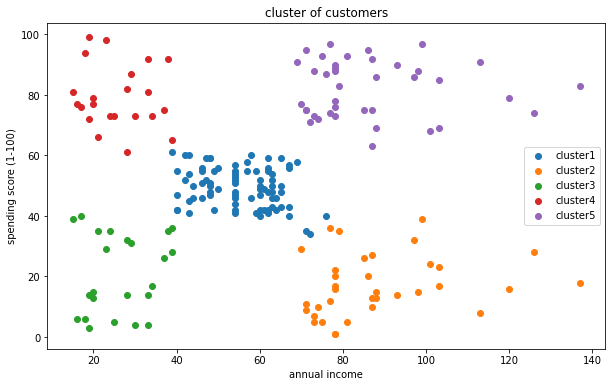

In [12]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state=42)
y_pred=kmeans.fit_predict(x)
plt.figure(figsize=(10,6))
for i in range(5):
    plt.scatter(x[y_pred==i,0], x[y_pred==i,1],label='cluster'+str(i+1))
    plt.legend()
plt.grid(False)
plt.title('Cluster of Customers')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()